In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
import pathlib
import cv2
import tensorflow_hub as hub

In [2]:
data_dir=pathlib.Path('/kaggle/input/brain-tumor-detection')
data_dir

PosixPath('/kaggle/input/brain-tumor-detection')

In [4]:
label_mapping={
    'Brain Tumor':list(data_dir.glob('yes/*')),
    'Normal': list(data_dir.glob('no/*'))
}

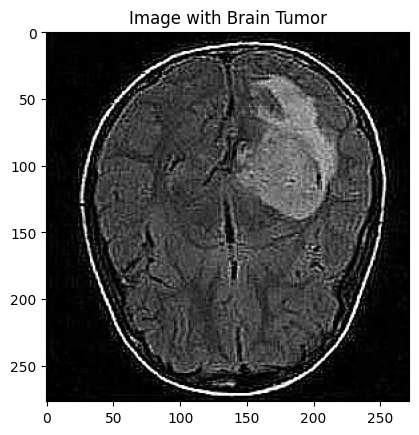

In [6]:
image1=cv2.imread(str(label_mapping['Brain Tumor'][0]))
plt.title('Image with Brain Tumor')
plt.imshow(image1)

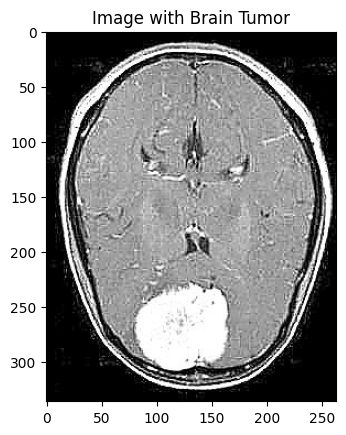

In [10]:
image2=cv2.imread(str(label_mapping['Brain Tumor'][1]))
plt.title('Image with Brain Tumor')
plt.imshow(image2)

In [7]:
image1.shape

(277, 272, 3)

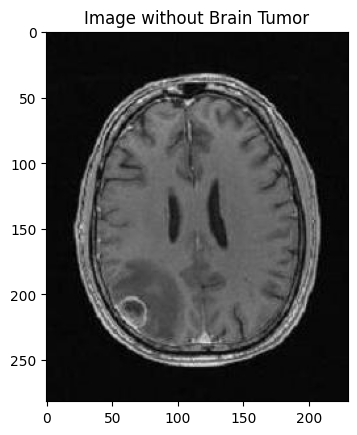

In [11]:
image3=cv2.imread(str(label_mapping['Normal'][0]))
plt.title('Image without Brain Tumor')
plt.imshow(image3)

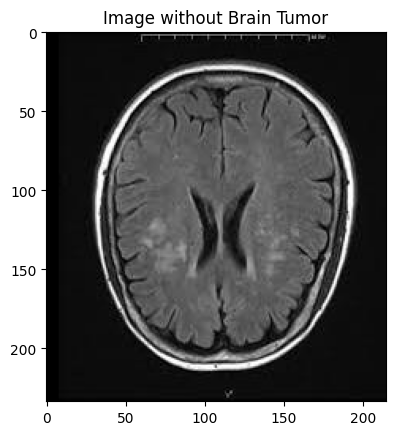

In [14]:
image4=cv2.imread(str(label_mapping['Normal'][1]))
plt.title('Image without Brain Tumor')
plt.imshow(image4)

In [12]:
image3.shape

(282, 230, 3)

In [16]:
images=[]
labels=[]
for label in label_mapping:
    paths=label_mapping[label]
    for path in paths:
        image=cv2.imread(str(path))
        image_rgb=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
        image_resized=cv2.resize(image_rgb,(224,224))
        images.append(image_resized)
        labels.append(label)

In [3]:
len(images)

3000

In [7]:
X=np.array(images)
y=np.array(labels)

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
y=le.fit_transform(y)

In [9]:
classes=le.inverse_transform([0,1])
classes

array(['Brain Tumor', 'Normal'], dtype='<U11')

In [10]:
X=X/255.0

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42,stratify=y)

In [22]:
x_train.shape

(2400, 224, 224, 3)

In [23]:
x_test.shape

(600, 224, 224, 3)

In [24]:
from tensorflow.keras.layers import Conv2D,Dense,MaxPooling2D,Flatten
cnn=keras.Sequential([
    Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)),
    MaxPooling2D((2,2)),
    Conv2D(64,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Conv2D(128,kernel_size=(3,3),activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])
cnn.compile(loss='binary_crossentropy',optimizer='adam',metrics=['Accuracy'])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [25]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(monitor='val_Accuracy',patience=5,restore_best_weights=True)
cnn.fit(x_train,y_train,validation_data=(x_test,y_test),epochs=50)

Epoch 1/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 8s 72ms/step - Accuracy: 0.6974 - loss: 0.7102 - val_Accuracy: 0.8933 - val_loss: 0.2845
Epoch 2/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - Accuracy: 0.9201 - loss: 0.2179 - val_Accuracy: 0.9333 - val_loss: 0.2115
Epoch 3/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - Accuracy: 0.9683 - loss: 0.0974 - val_Accuracy: 0.9633 - val_loss: 0.1561
Epoch 4/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - Accuracy: 0.9869 - loss: 0.0419 - val_Accuracy: 0.9700 - val_loss: 0.1462
Epoch 5/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - Accuracy: 0.9853 - loss: 0.0468 - val_Accuracy: 0.9650 - val_loss: 0.1726
Epoch 6/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - Accuracy: 0.9928 - loss: 0.0163 - val_Accuracy: 0.9700 - val_loss: 0.1834
Epoch 7/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - Accuracy: 1.0000 - loss: 0.0013 - val_Accuracy: 0.9767 - val_loss: 0.2140
Epoch 8/50
75/75 ━━━━━━━━━━━━━━━━━━━━ 4s 50ms/step - Accuracy: 1.0000 - loss: 4.3548e-04 - val_Accuracy: 0.9767

In [26]:
from sklearn.metrics import accuracy_score,classification_report
pred=cnn.predict(x_test)
pred=(pred>0.5).astype('int').flatten()
print(f'Accuracy : {accuracy_score(y_test,pred)}')
print(f'Classification Report :\n{classification_report(y_test,pred)}')

19/19 ━━━━━━━━━━━━━━━━━━━━ 1s 31ms/step
Accuracy : 0.98
Classification Report :
              precision    recall  f1-score   support

           0       0.98      0.98      0.98       300
           1       0.98      0.98      0.98       300

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600

